# Q-Learning

In [1]:
import numpy as np

class QLearningAgent():

    def __init__(self, states_high_bound, states_low_bound, nb_actions, nb_episodes, gamma, alpha, epsilon):
    
        self._epsilon = epsilon
        self._gamma = gamma
        self._alpha = alpha

        self._states_high_bound = states_high_bound
        self._states_low_bound = states_low_bound
        self._nb_actions = nb_actions
        
        # Define these variables (P2-2)
        self._nb_states = None
        self._tabular_q = None
        

    """ Epsilon-greedy policy 
    """
    def select_action(self, observation, greedy=False):
        # P1-3
        if np.random.random() > self._epsilon or greedy:
            pass

        else:
            pass
        
        action = 2
        return action


    """ Q-function update
    """
    def update(self, ob_t, ob_t1, action, reward, is_done):
        # P1-3
        terminal_condition = ob_t1[0] > 0.5

        if is_done and terminal_condition:
           pass

        else:
            pass
        
        # P1-5 only
        if is_done and self._epsilon > 0.0:
            pass


# Train agent

In [2]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
from qlearning import QLearningAgent


def train_agent(env, agent, nb_episodes, render=False):

    tr_episodes_vec, avg_reward_vec, std_reward_vec, avg_steps_vec, success_rate_vec = [], [], [], [], []
    _, (axes) = plt.subplots(1, 2, figsize=(12,4))

    for episode in range(nb_episodes):

        if episode % (nb_episodes / 20) == 0:
            update_performance_metrics(agent, episode, axes, tr_episodes_vec, 
                                        avg_reward_vec, std_reward_vec, 
                                        avg_steps_vec, success_rate_vec)
            
        ob_t = env.reset()
        done = False
        episode_reward = 0
        nb_steps = 0

        while not done:

            action = agent.select_action(ob_t)
            
            ob_t1, reward, done, _ = env.step(action)
            agent.update(ob_t, ob_t1, action, reward, done)

            ob_t = ob_t1
            episode_reward += reward
            nb_steps += 1

            if done:
                print('Training episode %5d | Steps: %4d | Reward: %4d | Success: %5r | Epsilon: %.3f' % \
                        (episode + 1, nb_steps, episode_reward, ob_t[0] > 0.5, agent._epsilon))
    
    
    update_performance_metrics(agent, episode, axes, tr_episodes_vec, 
                    avg_reward_vec, std_reward_vec, 
                    avg_steps_vec, success_rate_vec)
    plt.savefig('performance_metrics.pdf')
    plt.close()


def update_performance_metrics(agent, episode, axes, tr_episodes_vec, avg_reward_vec, std_reward_vec, avg_steps_vec, success_rate_vec):
    avg_reward, std_reward, avg_steps, success_rate = test_agent(env, agent, episode)

    tr_episodes_vec.append(episode + 1)
    avg_reward_vec.append(avg_reward)
    std_reward_vec.append(std_reward)
    avg_steps_vec.append(avg_steps)
    success_rate_vec.append(success_rate)

    plot_performance_metrics(axes, 
                            tr_episodes_vec, 
                            avg_reward_vec, 
                            std_reward_vec, 
                            success_rate_vec)

                
def test_agent(env, agent, training_episode, nb_episodes=30, render=True):

    ep_rewards = []
    success_rate = 0
    avg_steps = 0

    for episode in range(nb_episodes):

        ob_t = env.reset()
        done = False
        episode_reward = 0
        nb_steps = 0

        while not done:

            if render and episode == 0:
                env.render()
                time.sleep(1. / 60)
                
            action = agent.select_action(ob_t, greedy=True)
            
            ob_t1, reward, done, _ = env.step(action)

            ob_t = ob_t1
            episode_reward += reward
            
            nb_steps += 1

            if done:
                if ob_t[0] > 0.5:
                    success_rate += 1.
                avg_steps += nb_steps
                ep_rewards.append(episode_reward)
                print('Evaluation episode %3d | Steps: %4d | Reward: %4d | Success: %r' % (episode + 1, nb_steps, episode_reward, ob_t[0] > 0.5))
    
    ep_rewards = np.array(ep_rewards)
    avg_reward = np.average(ep_rewards)
    std_reward = np.std(ep_rewards)
    success_rate /= nb_episodes
    avg_steps /= nb_episodes
    print('Average Reward: %.2f, Reward Deviation: %.2f | Average Steps: %.2f, Success Rate: %.2f' % (avg_reward, std_reward, avg_steps, success_rate))

    return avg_reward, std_reward, avg_steps, success_rate


def plot_performance_metrics(axes, tr_episodes_vec, avg_reward_vec, std_reward_vec, success_rate_vec):
    ax1, ax2 = axes
    
    [ax.cla() for ax in axes]
    ax1.errorbar(tr_episodes_vec, avg_reward_vec, yerr=std_reward_vec, marker='.',color='C0')
    ax1.set_ylabel('Avg Reward')
    ax2.plot(tr_episodes_vec, success_rate_vec, marker='.',color='C1')
    ax2.set_ylabel('Success Rate')

    [ax.grid('on') for ax in axes]
    [ax.set_xlabel('episode') for ax in axes]
    plt.pause(0.05)




In [3]:
env = gym.make('MountainCar-v0')

# Actions are discrete ({0, 1, 2})
nb_actions = np.array(env.action_space.n)

# Real ranges: [-1.2, 0.6] and [-0.07, 0.07], respectively
states_high_bound = env.observation_space.high
states_low_bound = env.observation_space.low

nb_episodes = 10#12000

Evaluation episode   1 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   2 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   3 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   4 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   5 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   6 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   7 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   8 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   9 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  10 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  11 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  12 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  13 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  14 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  15 | Steps:  2

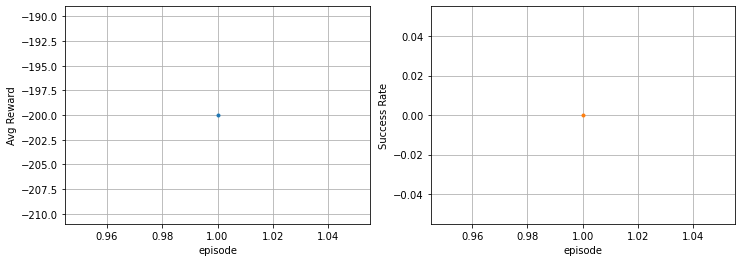

Training episode     1 | Steps:  200 | Reward: -200 | Success: False | Epsilon: 0.100
Evaluation episode   1 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   2 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   3 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   4 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   5 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   6 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   7 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   8 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode   9 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  10 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  11 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  12 | Steps:  200 | Reward: -200 | Success: False
Evaluation episode  13 | Steps:  200 | Reward: -200 | Success: False
Evaluation episod

In [5]:

# P2-5 (param epsilon change)
qlearning_agent = QLearningAgent( states_high_bound=states_high_bound, 
                        states_low_bound=states_low_bound, 
                        nb_actions=nb_actions,
                        nb_episodes=nb_episodes,
                        gamma=0.95,
                        alpha=0.15,
                        epsilon=0.1)


train_agent(env=env, agent=qlearning_agent, nb_episodes=nb_episodes, render=True)
